<a href="https://colab.research.google.com/github/DAIVSONAZE/Vendas_eletronicos_colab_analise/blob/master/DadosVendasEletronicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas-profiling

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt


In [ ]:
datas = pd.date_range("20200116", periods=6, freq="D")

In [ ]:
datas

DatetimeIndex(['2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19',
               '2020-01-20', '2020-01-21'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index= datas , columns= list("ABCD"))

In [ ]:
df

In [ ]:
df2 = pd.DataFrame({"A": 7, #dicionario
                    "B": pd.Timestamp("20200716"),
                    "C":pd.Series(1, index= list(range(4)), dtype="float32"),
                    "D": np.array([3] * 4, dtype="int32"),
                    "E": pd.Categorical(["test", "train", "test", "trains"]),
                    "F": "Python"})

In [ ]:
df2

In [5]:
dadosvendas_dataframe = pd.read_excel("/content/vendaseletronicos.xlsx")

In [ ]:
dadosvendas_dataframe.head(500) # os 500 primeiros dados mostrados

Data_venda       Canal  ProductKey  ...  Custo_Total Vendas_Total Ano_venda
0   2015-01-01        Loja           3  ...        66.60     128.5020        15
1   2015-01-01      Online           4  ...        88.00     194.1300        15
2   2015-01-01        Loja           4  ...        88.00     155.3040        15
3   2015-01-01        Loja           4  ...        99.00     191.9730        15
4   2015-01-01        Loja           4  ...       132.00     277.1745        15
..         ...         ...         ...  ...          ...          ...       ...
495 2015-01-22  Revendedor          34  ...       440.28     863.5500        15
496 2015-01-23  Revendedor           1  ...       112.54     231.2220        15
497 2015-01-23        Loja           2  ...        59.58     114.3120        15
498 2015-01-23      Online           2  ...        46.34      98.7240        15
499 2015-01-23      Online           2  ...        86.06     168.8700        15

[500 rows x 16 columns]

In [8]:
# Número de NaN
dadosvendas_dataframe.isnull().sum().sum()

0

In [ ]:
#Onde houver NaN vai ser substituido por 0
dadosvendas_dataframe.fillna(value=0)

Data_venda     Canal  ProductKey  ...  Custo_Total Vendas_Total Ano_venda
0     2015-01-01      Loja           3  ...        66.60     128.5020        15
1     2015-01-01    Online           4  ...        88.00     194.1300        15
2     2015-01-01      Loja           4  ...        88.00     155.3040        15
3     2015-01-01      Loja           4  ...        99.00     191.9730        15
4     2015-01-01      Loja           4  ...       132.00     277.1745        15
...          ...       ...         ...  ...          ...          ...       ...
21800 2016-12-27    Online          11  ...       795.08    1535.7440        16
21801 2016-12-27      Loja          11  ...       795.08    1559.7400        16
21802 2016-12-27  Catálogo          13  ...       928.72    1988.6080        16
21803 2016-12-27      Loja          16  ...       657.28    1341.3900        16
21804 2016-12-27      Loja          19  ...       657.28    1341.3900        16

[21805 rows x 16 columns]

In [ ]:
#todos os valores que se repetem das colunas que nao possui NaN. dropa=False ( despreza o NaN)
dadosvendas_dataframe.nunique(axis=0,dropna=True)

Data_venda          726
Canal                 4
ProductKey           31
Cod_Produto          31
Desc_Produto         31
Classe_Produto        2
Custo_Unit           10
Preco_Unit           10
Qtd_Venda            31
Qtd_Devolução         4
Valor_Devolução      25
Qtd_Desconto         15
Valor_Desconto      284
Custo_Total         327
Vendas_Total       1246
Ano_venda             2
dtype: int64

In [ ]:
# quantidade de linhas e colunas
print("Dataset shape: " + str(dadosvendas_dataframe.shape ))

Dataset shape: (21805, 16)


In [ ]:
#Informções do Dataset
print(" Dataset Information: " + str(dadosvendas_dataframe.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data_venda       21805 non-null  datetime64[ns]
 1   Canal            21805 non-null  object        
 2   ProductKey       21805 non-null  int64         
 3   Cod_Produto      21805 non-null  int64         
 4   Desc_Produto     21805 non-null  object        
 5   Classe_Produto   21805 non-null  object        
 6   Custo_Unit       21805 non-null  float64       
 7   Preco_Unit       21805 non-null  float64       
 8   Qtd_Venda        21805 non-null  int64         
 9   Qtd_Devolução    21805 non-null  int64         
 10  Valor_Devolução  21805 non-null  float64       
 11  Qtd_Desconto     21805 non-null  int64         
 12  Valor_Desconto   21805 non-null  float64       
 13  Custo_Total      21805 non-null  float64       
 14  Vendas_Total     21805 non-null  float

In [ ]:
#estatística descritiva dos dados transposta
dadosvendas_dataframe.describe().T

count           mean  ...         75%        max
ProductKey       21805.0      15.695941  ...      23.000      34.00
Cod_Produto      21805.0  101015.695941  ...  101023.000  101034.00
Custo_Unit       21805.0      43.291183  ...      61.620      91.93
Preco_Unit       21805.0     102.435239  ...     134.000     255.00
Qtd_Venda        21805.0      14.864114  ...      18.000     130.00
Qtd_Devolução    21805.0       0.144095  ...       0.000       3.00
Valor_Devolução  21805.0      14.536632  ...       0.000     510.00
Qtd_Desconto     21805.0       1.480349  ...       3.000      16.00
Valor_Desconto   21805.0      19.755866  ...      23.304     663.00
Custo_Total      21805.0     584.981128  ...     795.080    5491.85
Vendas_Total     21805.0    1362.762767  ...    1841.016   16269.00
Ano_venda        21805.0      15.462417  ...      16.000      16.00

[12 rows x 8 columns]

In [ ]:
dadosvendas_dataframe.tail(3) # as 3 ultimas linhas

Data_venda     Canal  ProductKey  ...  Custo_Total Vendas_Total Ano_venda
21802 2016-12-27  Catálogo          13  ...       928.72     1988.608        16
21803 2016-12-27      Loja          16  ...       657.28     1341.390        16
21804 2016-12-27      Loja          19  ...       657.28     1341.390        16

[3 rows x 16 columns]

In [ ]:
dadosvendas_dataframe.index # todos os indices

RangeIndex(start=0, stop=21805, step=1)

In [ ]:
dadosvendas_dataframe.columns # todas as colunas

Index(['Data_venda', 'Canal', 'ProductKey', 'Cod_Produto', 'Desc_Produto',
       'Classe_Produto', 'Custo_Unit', 'Preco_Unit', 'Qtd_Venda',
       'Qtd_Devolução', 'Valor_Devolução', 'Qtd_Desconto', 'Valor_Desconto',
       'Custo_Total', 'Vendas_Total', 'Ano_venda'],
      dtype='object')

In [ ]:
# descrição de todos os dados de uma determinada linha
dadosvendas_dataframe.iloc[1]

Data_venda                       2015-01-01 00:00:00
Canal                                         Online
ProductKey                                         4
Cod_Produto                                   101004
Desc_Produto       Produto 2G MP3 Player E200 Silver
Classe_Produto                             Econômico
Custo_Unit                                        11
Preco_Unit                                     21.57
Qtd_Venda                                          9
Qtd_Devolução                                      1
Valor_Devolução                                21.57
Qtd_Desconto                                       0
Valor_Desconto                                     0
Custo_Total                                       88
Vendas_Total                                  194.13
Ano_venda                                         15
Name: 1, dtype: object

In [ ]:
# dados de um intervalo de linhas e colunas
dadosvendas_dataframe.iloc[1 : 5, 1 : 8]

Canal  ProductKey  Cod_Produto  ... Classe_Produto Custo_Unit  Preco_Unit
1  Online           4       101004  ...      Econômico       11.0       21.57
2    Loja           4       101004  ...      Econômico       11.0       21.57
3    Loja           4       101004  ...      Econômico       11.0       21.57
4    Loja           4       101004  ...      Econômico       11.0       21.57

[4 rows x 7 columns]

In [ ]:
#linhas de 1 ate 4 e todas as colunas
dadosvendas_dataframe.iloc[1 : 5, :]

Data_venda   Canal  ProductKey  ...  Custo_Total Vendas_Total Ano_venda
1 2015-01-01  Online           4  ...         88.0     194.1300        15
2 2015-01-01    Loja           4  ...         88.0     155.3040        15
3 2015-01-01    Loja           4  ...         99.0     191.9730        15
4 2015-01-01    Loja           4  ...        132.0     277.1745        15

[4 rows x 16 columns]

In [ ]:
#Todas as linhas e colunas de 1 a 7
dadosvendas_dataframe.iloc[ :, 1 : 8]

Canal  ProductKey  Cod_Produto  ... Classe_Produto Custo_Unit  Preco_Unit
0          Loja           3       101003  ...      Econômico       7.40       14.52
1        Online           4       101004  ...      Econômico      11.00       21.57
2          Loja           4       101004  ...      Econômico      11.00       21.57
3          Loja           4       101004  ...      Econômico      11.00       21.57
4          Loja           4       101004  ...      Econômico      11.00       21.57
...         ...         ...          ...  ...            ...        ...         ...
21800    Online          11       101011  ...      Econômico      30.58       59.99
21801      Loja          11       101011  ...      Econômico      30.58       59.99
21802  Catálogo          13       101013  ...      Econômico      35.72       77.68
21803      Loja          16       101016  ...        Regular      50.56      109.95
21804      Loja          19       101019  ...        Regular      50.56      109.95

[21805 rows x 7 columns]

In [ ]:
#quantidade de produtos devolvidos maiores que 1
dadosvendas_dataframe[dadosvendas_dataframe.Qtd_Devolução > 1]

Data_venda       Canal  ProductKey  ...  Custo_Total Vendas_Total Ano_venda
122   2015-01-06  Revendedor           9  ...       489.28    1061.8230        15
546   2015-01-25      Online           2  ...       158.88     335.7915        15
842   2015-02-06  Revendedor           7  ...       264.00     552.1920        15
949   2015-02-10        Loja          12  ...       571.52    1351.6320        15
1132  2015-02-16      Online          16  ...      1112.32    2592.6210        15
...          ...         ...         ...  ...          ...          ...       ...
20277 2016-11-05  Revendedor          31  ...      1182.86    3927.0000        16
20777 2016-11-22  Revendedor           8  ...      1590.16    3083.4860        16
21460 2016-12-16        Loja           7  ...       572.00    1087.1280        16
21514 2016-12-17    Catálogo          30  ...      2027.76    6375.0000        16
21792 2016-12-27  Revendedor           2  ...       211.84     400.0920        16

[67 rows x 16 columns]

In [ ]:
# slice - Mostrar todas as classes de produtos e o canal de vendas no intervalo de tempo descrito
dadosvendas_dataframe.loc["2015-01-01": "2016-01-01", ["Classe_Produto", "Canal" ] ]

Classe_Produto       Canal
20150        Regular        Loja
20151        Regular      Online
20152        Regular  Revendedor
20153        Regular        Loja
20154        Regular        Loja
20155        Regular      Online
20156        Regular  Revendedor
20157        Regular        Loja
20158        Regular      Online
20159        Regular        Loja

In [ ]:
intervaloData =  dadosvendas_dataframe.loc["2015-01-01": "2016-01-01", ["Classe_Produto", "Canal" ] ]

In [ ]:
len(intervaloData)

In [ ]:
#soma das devoluçoes agrupados em Desc_Produto
dadosvendas_dataframe.groupby(["Desc_Produto"])["Qtd_Devolução"].sum().sort_values(ascending=False)

Desc_Produto
Produto 8GB -Slim MP3/Video Player M800 White    139
Produto 512MB MP3 Player E51 Blue                136
Produto 4G MP3 Player E400 Orange                135
Produto 1G MP3 Player E100 White                 125
Produto 4GB  MP3 Player E401 White               125
Produto 4GB  MP3 Player E401 Blue                123
Produto 4GB  MP3 Player E401 Silver              122
Produto 4GB  MP3 Player E401 Black               121
Produto 2G MP3 Player E200 Black                 121
Produto 2G MP3 Player E200 Blue                  121
Produto 512MB MP3 Player E51 Silver              120
Produto 2G MP3 Player E200 Red                   120
Produto 2G MP3 Player E200 Silver                120
Produto 4G MP3 Player E400 Silver                118
Produto 8GB -Slim MP3/Video Player M800 Pink     110
Produto 8GB MP3 Player new  M820 Black           110
Produto 4G MP3 Player E400 Black                 107
Produto 8GB -Slim MP3/Video Player M800 Red      106
Produto 32GB Video MP3 Player M32

In [ ]:
#soma da quantidade vendida de cada produto
dadosvendas_dataframe.groupby(["Desc_Produto"])["Qtd_Venda"].sum().sort_values(ascending=False)

Desc_Produto
Produto 4GB  MP3 Player E401 White               14924
Produto 4GB  MP3 Player E401 Black               14632
Produto 4G MP3 Player E400 Black                 14467
Produto 1G MP3 Player E100 White                 14421
Produto 4G MP3 Player E400 Orange                14389
Produto 2G MP3 Player E200 Red                   14207
Produto 2G MP3 Player E200 Blue                  14156
Produto 4GB  MP3 Player E401 Silver              14082
Produto 512MB MP3 Player E51 Silver              13883
Produto 4GB  MP3 Player E401 Blue                13839
Produto 2G MP3 Player E200 Silver                13824
Produto 4G MP3 Player E400 Silver                13806
Produto 2G MP3 Player E200 Black                 13780
Produto 512MB MP3 Player E51 Blue                13719
Produto 8GB -Slim MP3/Video Player M800 White    10754
Produto 8GB -Slim MP3/Video Player M800 Red       9753
Produto 8GB MP3 Player new  M820 Blue             9493
Produto 8GB -Slim MP3/Video Player M800 Pink      94

In [ ]:
# soma das quantidades de cada produto por ano de forma ascendente
dadosvendas_dataframe.groupby(["Ano_venda","Cod_Produto", "Desc_Produto",   ])["Qtd_Venda"  ].sum().sort_values(ascending=False)

Ano_venda  Cod_Produto  Desc_Produto                                 
16         101015       Produto 4GB  MP3 Player E401 White               9078
           101007       Produto 2G MP3 Player E200 Blue                  8428
           101005       Produto 2G MP3 Player E200 Red                   8414
           101012       Produto 4GB  MP3 Player E401 Blue                8248
           101013       Produto 4GB  MP3 Player E401 Black               8242
           101003       Produto 1G MP3 Player E100 White                 8222
           101011       Produto 4G MP3 Player E400 Orange                8160
           101009       Produto 4G MP3 Player E400 Black                 8100
           101006       Produto 2G MP3 Player E200 Black                 8054
           101001       Produto 512MB MP3 Player E51 Silver              8022
           101004       Produto 2G MP3 Player E200 Silver                7998
           101008       Produto 4G MP3 Player E400 Silver               

In [ ]:
# média do total de vendas descrevendo o produto por ano de venda
dadosvendas_dataframe.groupby(["Ano_venda", "Cod_Produto", "Desc_Produto",   ])["Vendas_Total"  ].mean()

Ano_venda  Cod_Produto  Desc_Produto                                 
15         101001       Produto 512MB MP3 Player E51 Silver               154.067815
           101002       Produto 512MB MP3 Player E51 Blue                 152.359429
           101003       Produto 1G MP3 Player E100 White                  173.780769
           101004       Produto 2G MP3 Player E200 Silver                 260.711220
           101005       Produto 2G MP3 Player E200 Red                    258.952164
           101006       Produto 2G MP3 Player E200 Black                  256.204827
           101007       Produto 2G MP3 Player E200 Blue                   249.356272
           101008       Produto 4G MP3 Player E400 Silver                 711.700451
           101009       Produto 4G MP3 Player E400 Black                  733.801656
           101011       Produto 4G MP3 Player E400 Orange                 732.912887
           101012       Produto 4GB  MP3 Player E401 Blue                 936.55

In [ ]:
#soma do total de vendas descrevendo o produto por canal
dadosvendas_dataframe.groupby(["Canal", "Desc_Produto",   ])["Vendas_Total"  ].sum()

Canal       Desc_Produto                                 
Catálogo    Produto 16GB Mp5 Player M1600 Black               45397.2900
            Produto 16GB Mp5 Player M1600 Blue                62418.7750
            Produto 16GB Mp5 Player M1600 Red                 51894.0400
            Produto 16GB Mp5 Player M1600 White               59850.0600
            Produto 1G MP3 Player E100 White                  16732.1220
                                                                ...     
Revendedor  Produto 8GB -Slim MP3/Video Player M800 White    158157.5775
            Produto 8GB MP3 Player new  M820 Black           210077.1600
            Produto 8GB MP3 Player new  M820 Blue            164168.7600
            Produto 8GB MP3 Player new  M820 White           179346.9400
            Produto 8GB MP3 Player new  M820 Yellow          179430.0200
Name: Vendas_Total, Length: 124, dtype: float64

In [ ]:
 #somando o total de vendas dos 10 primeiros produtos por Canal
dadosvendas_dataframe.groupby(["Canal", "Desc_Produto",   ])["Vendas_Total"  ].sum().head(100)

Canal       Desc_Produto                       
Catálogo    Produto 16GB Mp5 Player M1600 Black     45397.2900
            Produto 16GB Mp5 Player M1600 Blue      62418.7750
            Produto 16GB Mp5 Player M1600 Red       51894.0400
            Produto 16GB Mp5 Player M1600 White     59850.0600
            Produto 1G MP3 Player E100 White        16732.1220
                                                      ...     
Revendedor  Produto 16GB Mp5 Player M1600 Red      104201.8730
            Produto 16GB Mp5 Player M1600 White    109551.1970
            Produto 1G MP3 Player E100 White        29321.5428
            Produto 2G MP3 Player E200 Black        36414.9054
            Produto 2G MP3 Player E200 Blue         44555.4234
Name: Vendas_Total, Length: 100, dtype: float64

In [ ]:
#novo dataframe. Dataframe com AnoVenda, Produto e Qtd_vendida
dados = pd.DataFrame({"Classe":dadosvendas_dataframe['Classe_Produto'], 
                             "Produto":dadosvendas_dataframe['Desc_Produto'], 
                             "Qtd_Vendida":dadosvendas_dataframe['Qtd_Venda']} )

In [ ]:
dados

Classe                                        Produto  Qtd_Vendida
0      Econômico               Produto 1G MP3 Player E100 White            9
1      Econômico              Produto 2G MP3 Player E200 Silver            9
2      Econômico              Produto 2G MP3 Player E200 Silver            8
3      Econômico              Produto 2G MP3 Player E200 Silver            9
4      Econômico              Produto 2G MP3 Player E200 Silver           13
...          ...                                            ...          ...
21800  Econômico              Produto 4G MP3 Player E400 Orange           26
21801  Econômico              Produto 4G MP3 Player E400 Orange           26
21802  Econômico             Produto 4GB  MP3 Player E401 Black           26
21803    Regular  Produto 8GB -Slim MP3/Video Player M800 White           13
21804    Regular   Produto 8GB -Slim MP3/Video Player M800 Pink           13

[21805 rows x 3 columns]

In [ ]:
#redefinir a Qtd_Vendida de NaN para Não definido
dados.replace({"Qtd_Vendida": {np.nan:"Não definido"}})

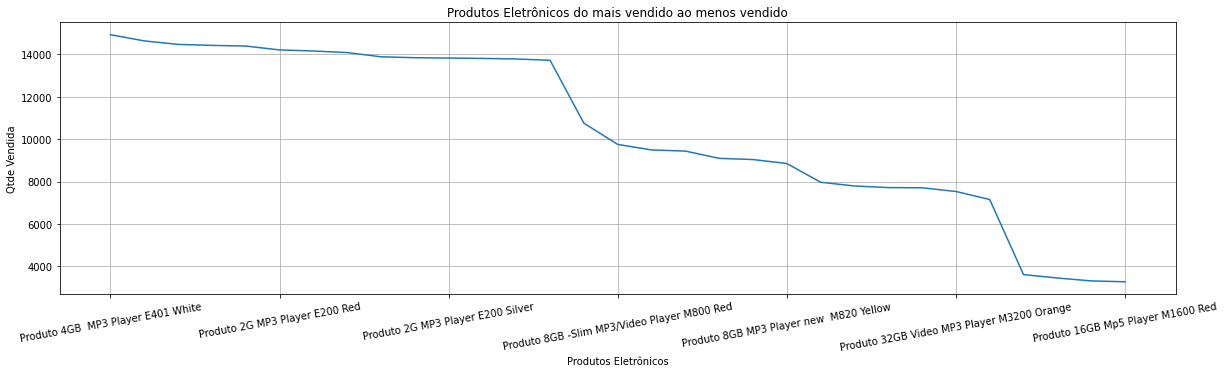

In [ ]:
# Os produtos eletrônicos do mais vendido ao menos vendido
#groupby = agrupar os dados
#sum() = somar a Qtd_Venda
#sort_values = organizar do maior para o menor ou inverso
#head = os 10 primeiros dados
#plot() = plotar o gráfico
# plot(kind = o tipo de barras, figsize = dimensões do gráfico(largura, altura), grid = se tem grades no gráfico, rot = roração das infomações do eioxo x, color = cor das colunas)
dadosvendas_dataframe.groupby(["Desc_Produto"])["Qtd_Venda"].sum().sort_values(ascending=False).plot(figsize = (20,5), grid = True, rot = 10)
plt.title('Produtos Eletrônicos do mais vendido ao menos vendido')
plt.xlabel('Produtos Eletrônicos') #nomeando o eixo X
plt.ylabel('Qtde Vendida') #nomeando o eixo y
plt.show() #evita de aparecer essas informações no canto esquerdo superior: Text(0, 0.5, 'Qtde Vendida')

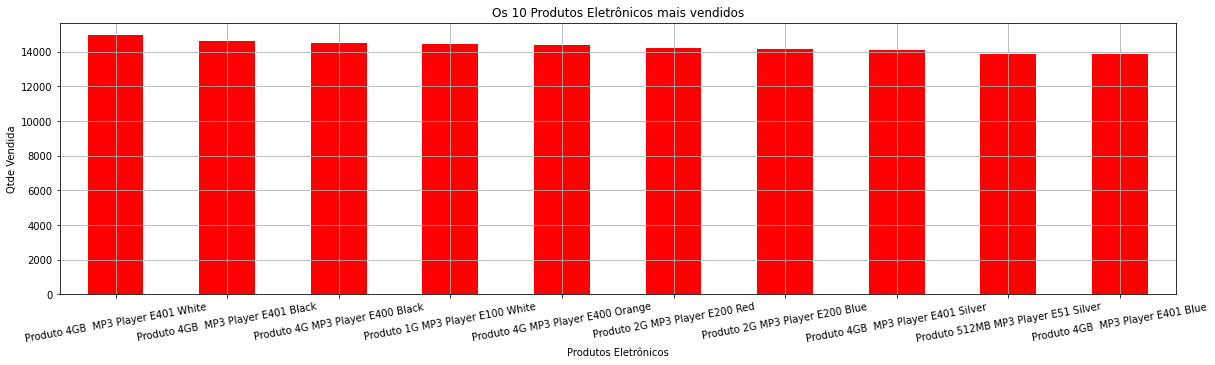

In [ ]:
# Os 10 primeiro produtos eletrônicos mais vendidos
dadosvendas_dataframe.groupby(["Desc_Produto"])["Qtd_Venda"].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (20,5), grid = True, rot = 10, color = 'red')
#Aprimorando o gráfico
plt.title('Os 10 Produtos Eletrônicos mais vendidos')
plt.xlabel('Produtos Eletrônicos') #nomeando o eixo X
plt.ylabel('Qtde Vendida') #nomeando o eixo y
plt.show() #para exibir  gráfico

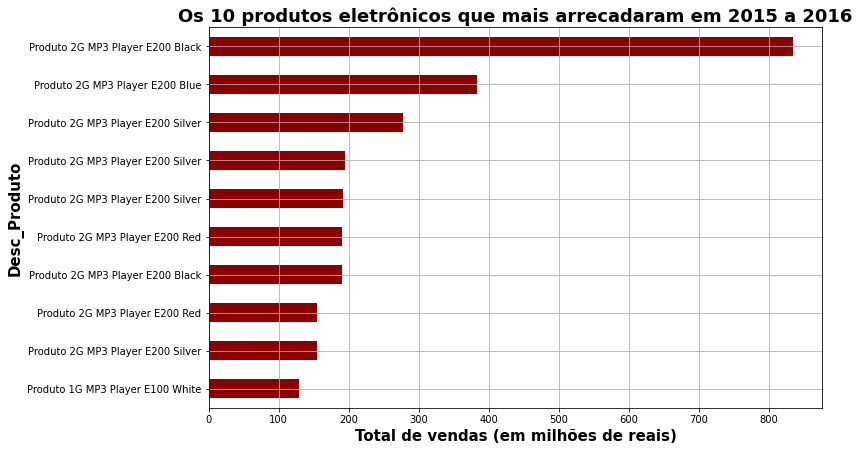

In [ ]:
#Os 10 produtos eletrônicos mais vendidos com seus respectivos valores 
vendidos_10 = dadosvendas_dataframe[["Desc_Produto","Vendas_Total" ]].head(10).set_index("Desc_Produto").sort_values("Vendas_Total", ascending=True)
vendidos_10.plot(kind='barh', figsize=(11,7), grid=True, color='darkred', legend=False)


plt.title('Os 10 produtos eletrônicos que mais arrecadaram em 2015 a 2016', fontweight='bold', size=18)
plt.xlabel('Total de vendas (em milhões de reais)', fontweight='bold', size=15)
plt.ylabel('Desc_Produto', fontweight='bold', size=15)
plt.show()

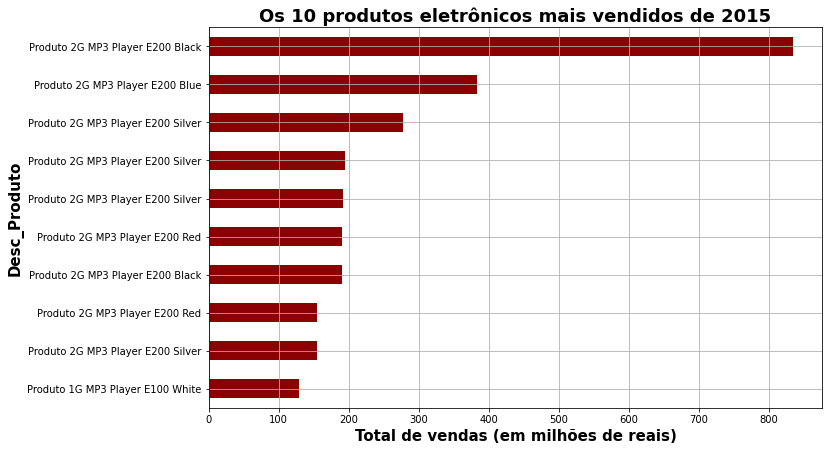

In [ ]:


#Os 10 produtos eletrônicos mais vendidos com seus respectivos valores de 2015 
vendas_2015 = dadosvendas_dataframe.query('Ano_venda == 15')
vendidos_10 = vendas_2015[["Desc_Produto","Vendas_Total" ]].head(10).set_index("Desc_Produto").sort_values("Vendas_Total", ascending=True)
vendidos_10.plot(kind='barh', figsize=(11,7), grid=True, color='darkred', legend=False)


plt.title('Os 10 produtos eletrônicos mais vendidos de 2015', fontweight='bold', size=18)
plt.xlabel('Total de vendas (em milhões de reais)', fontweight='bold', size=15)
plt.ylabel('Desc_Produto', fontweight='bold', size=15)
plt.show()

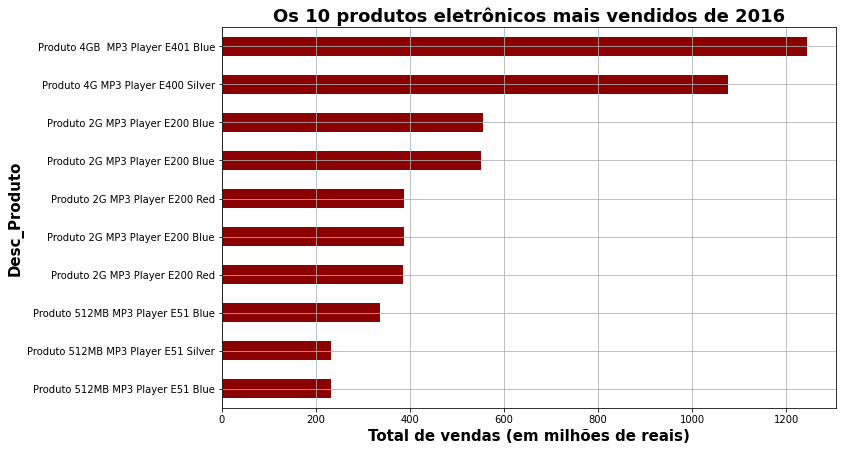

In [ ]:

#Os 10 produtos eletrônicos mais vendidos com seus respectivos valores de 2016 
vendas_2015 = dadosvendas_dataframe.query('Ano_venda == 16')
vendidos_10 = vendas_2015[["Desc_Produto","Vendas_Total" ]].head(10).set_index("Desc_Produto").sort_values("Vendas_Total", ascending=True)
vendidos_10.plot(kind='barh', figsize=(11,7), grid=True, color='darkred', legend=False)


plt.title('Os 10 produtos eletrônicos mais vendidos de 2016', fontweight='bold', size=18)
plt.xlabel('Total de vendas (em milhões de reais)', fontweight='bold', size=15)
plt.ylabel('Desc_Produto', fontweight='bold', size=15)
plt.show()


In [ ]:
# Pandas Profiling - Visão geral do relatório detalhado da estatística descritiva dos dados
report = ProfileReport(dadosvendas_dataframe, title="Pandas Profiling report", html={"style":{"full_width": False}})
report